In [18]:
import random
import string
import time
import tracemalloc
import matplotlib.pyplot as plt

# printing lowercase
start = time.time()
tracemalloc.start()
s = string.ascii_lowercase
string = ''.join(random.choice(s) for i in range(1000))
#print ( ''.join(random.choice(s) for i in range(1000)) )
print(string)

gvhejphrgcnpabejcafuxhznyeztwqlvswsnhtkkgazemdyiybloguaiexmyhtqmevqenjqwomugcyycxbbfdllocqhokajrehfszwopkpwqlaziypzukfpdhkmahockejagqwfsxzhulcamjpngqqknshsrnrxkdexhmqkyglsbzgewqaolcwbuzocwbkfepwhfjmipmgnvfvqiggzwqbylklfctctaeondhvsirzddtrwucarurnehezykzygaepolvpbuspcclpiuiyjkltuklxaccfrsrgnxyhkglwvlvmoocvrrbccbgvytenoyojbwtlsfvusalkbknxnflvgxzplywnagkyhituiuxkfrwvfydoucfpyjsimvgjgbevdaoerhtiaiwewomqslfrvqhqzdiihbkocxbeqesexudasjfqvieunghyywcjycxmvmozodpljfopwirwqgyspbxlgaxpvhffmvopycdxvnxzehwpkmakjrdjtewqkwgejudrbmpqgvuydkoagirppudvskzgwnzxmigxbxyieyyntjseczbxcaqvvxsonhxtdmamsxwgpsbjwzvpfqellixptoevkpsjizzgtrdbtqwtclwxtvfeqpbthvcfqszcadpcfkurvyuallylfkerzusrotgjadlnruetfinfndinibptbqgkscsyoimcbvwdowvzkhygknpccznowukvmcrsyyaswkjzycskrpayvtikqtucykrrhzwjqxplkxamujjwyxsccppolrqtsiwrcrlgnffefjlprvgbbptxspqyridnbkaxpprfmpqofmhonupvixrqaijmlydlziomoivzamfomomeuuhvrnbffhixkhbpuqlukcoyabmarezajtbleuqofilevrrtvsrdgggypfckvswjhkihkywqxtqtvtaramkeetizgtbafeqboocnzozffumhvtshwaqjcimlipctqvsjbmkrlr

In [19]:
def longest_palindrome(s):
    if len(s) < 2:
        return s

    n_str = '#' + '#'.join(s) + '#'
    p = [0] * len(n_str)
    mx, loc = 0, 0
    index, maxlen = 0, 0
    for i in range(len(n_str)):
        if i < mx and 2 * loc - i < len(n_str):
            p[i] = min(mx - i, p[2 * loc - i])
        else:
            p[i] = 1

        while p[i] + i < len(n_str) and i - p[i] >= 0 and n_str[
                i - p[i]] == n_str[i + p[i]]:
            p[i] += 1

        if i + p[i] > mx:
            mx = i + p[i]
            loc = i

        if p[i] > maxlen:
            index = i
            maxlen = p[i]
    s = n_str[index - p[index] + 1:index + p[index]]
    return s.replace('#', '')
end = time.time()
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print(f"Runtime of the program is {end - start}")
print(longest_palindrome(string))



Current memory usage is 0.092391MB; Peak was 0.179871MB
Runtime of the program is 0.0396418571472168
iomoi


In [20]:
start = time.time()
tracemalloc.start()
string = ''.join(random.choice(s) for i in range(10000))
end = time.time()
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print(f"Runtime of the program is {end - start}")
print(longest_palindrome(string))

Current memory usage is 0.012827MB; Peak was 0.098188MB
Runtime of the program is 0.023409366607666016
ezqqze


In [21]:
start = time.time()
tracemalloc.start()
string = ''.join(random.choice(s) for i in range(100000))
end = time.time()
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print(f"Runtime of the program is {end - start}")
print(longest_palindrome(string))

Current memory usage is 0.1066MB; Peak was 0.908291MB
Runtime of the program is 0.27001404762268066
excocxe


In [22]:
start = time.time()
tracemalloc.start()
string = ''.join(random.choice(s) for i in range(500000))
end = time.time()
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print(f"Runtime of the program is {end - start}")
print(longest_palindrome(string))

Current memory usage is 0.506928MB; Peak was 4.675113MB
Runtime of the program is 0.9543538093566895
mtftvtftm


In [23]:
start = time.time()
tracemalloc.start()
string = ''.join(random.choice(s) for i in range(1000000))
end = time.time()
current, peak = tracemalloc.get_traced_memory()
print(f"Current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
tracemalloc.stop()
print(f"Runtime of the program is {end - start}")
print(longest_palindrome(string))

Current memory usage is 1.001679MB; Peak was 9.45164MB
Runtime of the program is 1.9972152709960938
ykgpbpgky


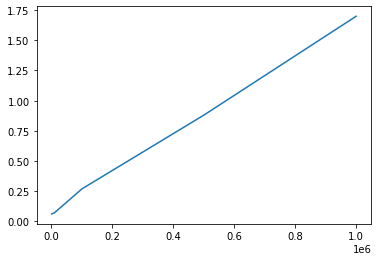

In [24]:
plt.plot([1000, 10000, 100000, 500000, 1000000],[ 0.059, 0.069, 0.267, 0.879,1.7])

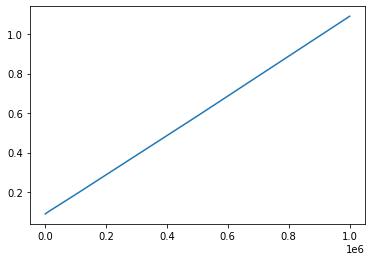

In [25]:
plt.plot( [1000, 10000, 100000, 500000, 1000000],[ 0.089, 0.099, 0.187, 0.585,1.0905])